In [1]:
import numpy as np

last_state_psiTrue = np.load("runs/last_state_trial_1_with_psi_restriction_True_randomised_state_True_goal_True_test_psiRemoved.npy")
#last_state_psiFalse = np.load("runtesla/last_state_trial_5_with_psi_restriction_False_randomised_state_True_goal_False.npy")

In [2]:
print(np.shape(last_state_psiTrue))

(501, 10, 12)


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
def add_arrow_to_line2D(axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowstyle='-|>', arrowsize=1, transform=None):
    if not isinstance(line, mlines.Line2D):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line.get_xdata(), line.get_ydata()
    arrow_kw = {
        "arrowstyle": arrowstyle,
        "mutation_scale": 10 * arrowsize,
    }
    color = line.get_color()
    use_multicolor_lines = isinstance(color, np.ndarray)
    if use_multicolor_lines:
        raise NotImplementedError("multicolor lines not supported")
    else:
        arrow_kw['color'] = color
    linewidth = line.get_linewidth()
    if isinstance(linewidth, np.ndarray):
        raise NotImplementedError("multiwidth lines not supported")
    else:
        arrow_kw['linewidth'] = linewidth
    if transform is None:
        transform = axes.transData
    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows
def draw(last_state, goal= True):
    colors = ['red','blue','green','orange','black','yellow','purple','pink']
    fig, ax = plt.subplots(1, 1)
    randomised_position = False
    omega = last_state[:, :, 0]
    omega_dot = last_state[:, :, 1]
    omega_ddot = last_state[:, :, 2]
    theta = last_state[:, :, 3]
    print(np.mean(omega)*np.pi/180)
    print(np.mean(theta)*np.pi/180)
    theta_dot = last_state[:, :, 4]  # theta - handle bar, omega - angle of bicycle to verticle
    x_f = last_state[:, :, 5]
    y_f = last_state[:, :, 6]
    x_b = last_state[:, :, 7]
    y_b = last_state[:, :, 8]
    psi = last_state[:, :, 9]
    plt.scatter(x_f[0],y_f[0],marker = 'o')
    plt.scatter(x_f[-1],y_f[-1],marker='x')

    display = 10
    batch_size = 10
    yg = 20.
    xg = 0.
    goal_position = tf.cast(
        (np.random.uniform(low= -50, high= 50, size=(batch_size, 2))) * (1 if randomised_position else 0),
        tf.float64)
    #plt.axis([-5,-5,-5,5])
    if not randomised_position:
        goal_position += [[xg,yg]]*batch_size
    if batch_size >= display:
            for i in range(display):
                x = x_f[:,i]
                y = y_f[:,i]
                line, = plt.plot(x, y, color=colors[i%8])
                add_arrow_to_line2D(ax,line)
                if goal:
                    plt.plot(goal_position[i, 0], goal_position[i, 1], color=colors[i%5], marker='o')

    plt.axis([-60,60,-2,20])
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")

0.0003870968369113372
0.0005697187073774445


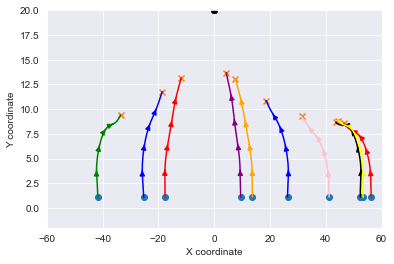

In [4]:
draw(last_state_psiTrue)
plt.savefig("trajectory_psiremoved.pdf")

0.0002397386492740686
0.0002858471661348986


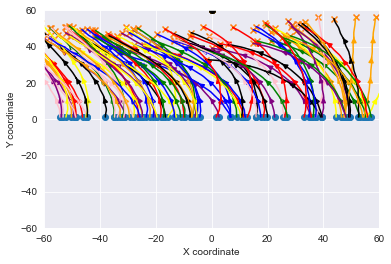

In [23]:
draw(last_state_psiTrue)

In [64]:
def drawomega(last_state):
    randomised_position = False
    colors = ['red','blue','green','orange','black','yellow','purple','pink']
    omega = last_state[:, :, 0]
    omega_dot = last_state[:, :, 1]
    omega_ddot = last_state[:, :, 2]
    theta = last_state[:, :, 3]
    omega = omega
    theta = theta
    theta_dot = last_state[:, :, 4]  # theta - handle bar, omega - angle of bicycle to verticle
    x_f = last_state[:, :, 5]
    y_f = last_state[:, :, 6]
    x_b = last_state[:, :, 7]
    y_b = last_state[:, :, 8]
    psi = last_state[:, :, 9]
    display = 8
    batch_size = 100
    yg = 60.
    xg = 60.
    plt.axis([0,100,-0.004,0.003])
    if batch_size >= display:
            for i in range(1):
                 plt.plot(omega[:,i]*np.pi/180, color=colors[i])
    plt.title("Omega")
    plt.xlabel("Timestep * 10^3")
    plt.ylabel("Omega in degrees")
def drawtheta(last_state):
    randomised_position = False
    colors = ['red','blue','green','orange','black','yellow','purple','pink']
    omega = last_state[:, :, 0]
    omega_dot = last_state[:, :, 1]
    omega_ddot = last_state[:, :, 2]
    theta = last_state[:, :, 3]
    omega = omega
    theta = theta
    theta_dot = last_state[:, :, 4]  # theta - handle bar, omega - angle of bicycle to verticle
    x_f = last_state[:, :, 5]
    y_f = last_state[:, :, 6]
    x_b = last_state[:, :, 7]
    y_b = last_state[:, :, 8]
    psi = last_state[:, :, 9]
    display = 8
    batch_size = 100
    yg = 60.
    xg = 60.
    plt.axis([0,100,-0.004,0.003])
    if batch_size >= display:
            for i in range(1):
                 plt.plot(theta[:,i]*np.pi/180, color=colors[i])
    plt.title("Theta")
    plt.xlabel("Timestep * 10^3")
    plt.ylabel("Theta in degrees")

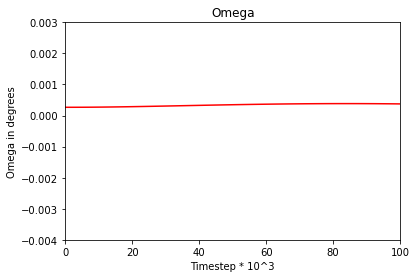

In [65]:
drawomega(last_state_psiTrue)

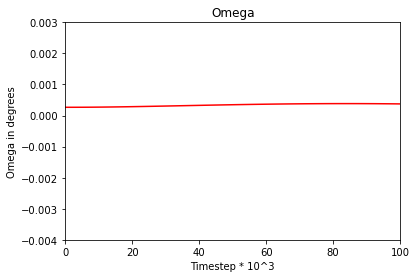

In [66]:
drawomega(last_state_psiTrue)

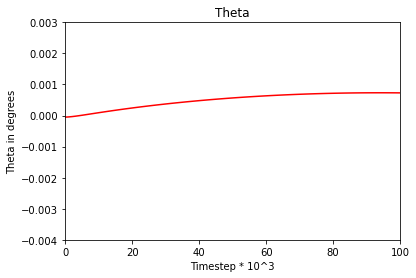

In [67]:
drawtheta(last_state_psiTrue)


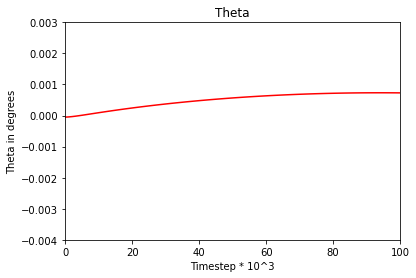

In [68]:
drawtheta(last_state_psiTrue)

[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 9999]
(21,)
[array([[ 1.00000000e+00,  0.00000000e+00, -1.88581880e+03],
       [ 1.00000000e+00,  1.00000000e+00, -1.88354990e+03],
       [ 1.00000000e+00,  2.00000000e+00, -1.88355159e+03],
       ...,
       [ 1.00000000e+00,  9.99700000e+03,  2.68571252e+01],
       [ 1.00000000e+00,  9.99800000e+03,  2.68818709e+01],
       [ 1.00000000e+00,  9.99900000e+03,  2.69066666e+01]])]
(10000, 3)


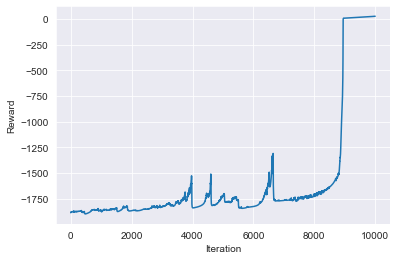

In [68]:
import seaborn
max_iteration = 10000
markers = [i * 500 for i in range(21)]
markers[-1] = markers[-1]-1
import pandas as pd
Trials_rewards = []
Trials_steps = []
x_axis = np.reshape([i for i in range(max_iteration)],(max_iteration,1))
print(markers)
for trial in range(1,2):
    reward_history_psiTrue = []
    reward_history_psiFalse = []
    step_history_psiTrue = []
    step_history_psiFalse = []
    for marker in markers:
        reward_temp_psiTrue =np.load("runs_xaxis/trial_"+str(trial)+"_marker_"+str(marker)+"_reward_history_trial_"+str(trial)+"_with_psi_restriction_True_randomised_state_True_goal_True_test_psiRemoved.npy")
        #reward_temp_psiFalse =np.load("runtesla/Trial_"+str(trial)+"_marker_"+str(marker)+"_reward_history_Trial_1_with_psi_restriction_False_randomised_state_True_goal_False.npy")
        step_temp_psiTrue =np.load("runs_xaxis/trial_"+str(trial)+"_marker_"+str(marker)+"_step_history_trial_"+str(trial)+"_with_psi_restriction_True_randomised_state_True_goal_True_test_psiRemoved.npy")
        #step_temp_psiFalse =np.load("runtesla/Trial_"+str(trial)+"_marker_"+str(marker)+"_step_history_Trial_1_with_psi_restriction_False_randomised_state_True_goal_False.npy")
        reward_history_psiTrue.append(reward_temp_psiTrue)
        #reward_history_psiFalse.append(reward_temp_psiFalse)
        step_history_psiTrue.append(step_temp_psiTrue)
        #step_history_psiFalse.append(step_temp_psiFalse)
    print(np.shape(reward_history_psiTrue))
    y_axis_reward = np.reshape(np.concatenate(reward_history_psiTrue,axis=0), (max_iteration,1))
    trials = np.reshape([trial]*max_iteration,[max_iteration,1])
    add_reward =  np.concatenate([trials,x_axis,y_axis_reward],axis=1)
    #print(np.shape(add_reward))
    Trials_rewards.append(add_reward)
    #reward_history_psiTrue = pd.DataFrame(add_reward,columns=['Iteration','Reward'])
    #reward_history_psiFalse = np.concatenate(reward_history_psiFalse,axis=0)
    y_axis_step = np.reshape(np.concatenate(step_history_psiTrue,axis=0), (max_iteration,1))
    add_step =  np.concatenate([np.reshape([trial]*max_iteration,[max_iteration,1]),x_axis,y_axis_step],axis=1)
    Trials_steps.append(add_step)

    #step_history_psiFalse = np.concatenate(step_history_psiFalse,axis=0)
    #seaborn.lineplot(data=reward_history_psiTrue,x='Iteration', y='Reward')
print(Trials_rewards)
Trials_rewards = np.reshape(Trials_rewards, (trial* max_iteration,3))
print(np.shape(Trials_rewards))
reward_history_psiTrue = pd.DataFrame(Trials_rewards,columns=['Trial','Iteration','Reward'])

seaborn.lineplot(data=reward_history_psiTrue,x='Iteration', y='Reward')

plt.savefig('reward_over_iteration_psi_true_goal.pdf')

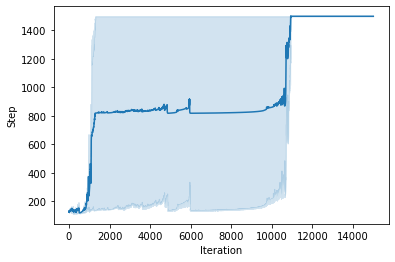

In [71]:

Trials_steps = np.reshape(Trials_steps, (trial* max_iteration,3))
step_history_psiTrue = pd.DataFrame(Trials_steps,columns=['Trial','Iteration','Step'])
seaborn.lineplot(data=step_history_psiTrue, x = "Iteration",y="Step")
plt.savefig('step_over_iteration_psi_true_goal.pdf')

In [ ]:
plt.plot(reward_history_psiTrue)
plt.title("reward_history_psiTrue")
plt.xlabel("iteration")
plt.ylabel("reward")

In [ ]:
plt.plot(reward_history_psiFalse)
plt.title("reward_history_psiFalse")
plt.xlabel("iteration")
plt.ylabel("reward")

In [ ]:
plt.plot(reward_history_psiTrue)
plt.title("step_history_psiTrue")
plt.xlabel("iteration")
plt.ylabel("step")

In [ ]:
plt.plot(reward_history_psiFalse)
plt.title("step_history_psiFalse")
plt.xlabel("iteration")
plt.ylabel("step")

In [ ]:
goal_psiTrue = np.load("runs/last_state_trial_3_with_psi_restriction_True_randomised_state_True_goal_True.npy")
draw(goal_psiTrue,goal=True)

In [ ]:
reward_history_psiTrue = []
step_history_psiTrue = []
markers = ["0","500","1000","1500","2000","2500","3000","3500","4000","4500","4999"]
trial = str(3)
for marker in markers:
    reward_temp_psiTrue =np.load("runs/Trial_"+str(trial)+"_marker_"+str(marker)+"_reward_history_Trial_"+str(trial)+"_with_psi_restriction_True_randomised_state_True_goal_True.npy")
    step_temp_psiTrue =np.load("runs/Trial_"+str(trial)+"_marker_"+str(marker)+"_step_history_Trial_"+str(trial)+"_with_psi_restriction_True_randomised_state_True_goal_True.npy")
    reward_history_psiTrue.append(reward_temp_psiTrue)
    step_history_psiTrue.append(step_temp_psiTrue)
reward_history_psiTrue = np.concatenate(reward_history_psiTrue,axis=0)
step_history_psiTrue = np.concatenate(step_history_psiTrue,axis=0)

In [ ]:
plt.plot(reward_history_psiTrue)
plt.title("reward_history_psiTrue")
plt.xlabel("iteration")
plt.ylabel("reward")

In [ ]:
plt.plot(step_history_psiTrue)
plt.title("step_history_psiTrue")
plt.xlabel("iteration")
plt.ylabel("reward")

In [ ]:
import multiprocessing
print(multiprocessing.cpu_count())


In [45]:
import math
from tensorflow import keras
import tensorflow as tf
import numpy as np
testt = "psiRemoved"
with_psi_restriction = False
tf.keras.backend.set_floatx('float64')
display = 5
action_is_theta = True
maximum_dis = 0.02 #0.02
maximum_torque = 2.
batch_size = 1
goal = True
action_space = 2 if action_is_theta else 1
num_hidden_units = [24,24]
trajectory_length = 100000
max_iterations = int(1)
learning_rate = 0.001
print_time = 1000
## BIKE STATS
# Units in meters and kilograms
c = 0.66  # Horizontal distance between point where front wheel touches ground and centre of mass
d_cm = 0.30  # Vertical distance between center of mass and cyclist
h = 0.94  # Height of center of mass over the ground
l = tf.constant(1.11,tf.float64)  # Distance between front tire and back tire at the point where they touch the ground.
m_c = 15.0  # mass of bicycle
m_d = 1.7  # mass of tire
m_p = 60.0  # mass of cyclist
r = 0.34  # radius of tire
v = 10.0 / 3.6  # velocity of the bicycle in m / s 2.7
goal_rsqrd = 1.0
# Useful Precomputations
m = m_c + m_p
inertia_bc = (13. / 3) * m_c * h ** 2 + m_p * (h + d_cm) ** 2  # inertia of bicycle and cyclist
inertia_dv = (3. / 2) * (m_d * (r ** 2))  # Various inertia of tires
inertia_dl = .5 * (m_d * (r ** 2))  # Various inertia of tires
inertia_dc = m_d * (r ** 2)  # Various inertia of tires
sigma_dot = float(v) / r
# Simulation constants
gravity = 9.82
delta_time = 0.01 #0.01 # 0.054 m forward per delta time
randomised_goal_position = False
randomised_state = True
randomised_position = False
# If omega exceeds +/- 12 degrees, the bicycle falls.
omega_range = np.array([[-np.pi * 12 / 180, np.pi * 12 / 180]] * batch_size)  # 12 degree in SI units.
theta_range = np.array([[-np.pi / 2, np.pi / 2]] * batch_size)
psi_range = np.array([[-np.pi, np.pi]] * batch_size)
rando = 0.0
yg =2500
xg = 0.
goal_position = tf.cast(
    (np.random.uniform(low= -50, high= 50, size=(batch_size, 2))) * (1 if randomised_position else 0),
    tf.float64)

if not randomised_position:
    goal_position += [[xg,yg]]*batch_size


def safe_divide(tensor_numerator, tensor_denominator):
    # attempt to avoid NaN bug in tf.where: https://github.com/tensorflow/tensorflow/issues/2540
    safe_denominator = tf.where(tf.not_equal(tensor_denominator, tf.zeros_like(tensor_denominator,tf.float64)), tensor_denominator,
                                tensor_denominator + 1)
    return tensor_numerator / safe_denominator
def reset():
    # Lagoudakis (2002) randomizes the initial state "arout the
    # equilibrium position"
    if randomised_state:
        theta = np.random.normal(0, 1,size= (batch_size,1)) * np.pi / 180
        omega = np.random.normal(0, 1,size=(batch_size,1)) * np.pi / 180
        thetad = np.zeros((batch_size,1))
        omegad = np.zeros((batch_size,1))
        omegadd = np.zeros((batch_size,1))
        xb = np.zeros((batch_size,1))
        yb = np.zeros((batch_size,1))
        xf = xb + (np.random.rand(batch_size,1) * l - 0.5 * l)/2 #halved it for psi
        yf = np.sqrt(l ** 2 - (xf - xb) ** 2) + yb
        psi = np.arctan((xb - xf) / (yf - yb))
        psig = psi - np.arctan(safe_divide((xb - xg), yg - yb))
        init_state = tf.Variable(np.concatenate([omega, omegad, omegadd, theta, thetad, xf, yf, xb, yb, psi, psig, np.zeros((batch_size,1))], axis=1), tf.float64)

    else:
        theta = thetad = omega = omegad = omegadd = xf = yf = xb = yb = np.zeros((batch_size,1))
        yf = yf +l
        psi = np.arctan((xb - xf) / (yf - yb))
        psig = psi - np.arctan(safe_divide((xb - xg), yg - yb))
        init_state = tf.Variable(np.concatenate(
            [omega, omegad, omegadd, theta, thetad, xf, yf, xb, yb, psi, psig, np.zeros((batch_size, 1))], axis=1),
                tf.float64)

    # omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
    return init_state

# STATE initialisation
# omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
state_dimension = 12  # omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
initial_state = reset()


def step(state, action, trajectories_terminated, corruption_to_physics_model=None):
    # Unpack the state and actions.
    # -----------------------------
    action = tf.cast(action, tf.float64)
    s = tf.cast(state, tf.float64)
    # omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
    omega = s[:, 0]
    omegad = s[:,1]
    theta = s[:, 3]
    thetad = s[:, 4]  # theta - handle bar, omega - angle of bicycle to verticle psi = bikes angle to the yaxis
    xf = s[:, 5]
    yf = s[:, 6]
    xb = s[:, 7]
    yb = s[:, 8]
    psi = s[:, 9]
    #psi = tf.zeros_like(psi,tf.float64)
    psig = s[:, 10]
    timestep = s[:, 11]
    # store a last states
    last_pos = s[:, 5:6]
    last_xf = xf
    last_yf = yf
    #last_omega = omega
    #last_psig = psig
    T = action[:, 0] * maximum_torque
    T = tf.where(T > maximum_torque, tf.ones_like(T) * maximum_torque, T)
    T = tf.where(T < -maximum_torque, tf.ones_like(T) * -maximum_torque, T)
    d = action[:, 1] * maximum_dis
    d = tf.where(d > maximum_dis, tf.ones_like(d) * maximum_dis, d)
    d = tf.where(d < -maximum_dis, tf.ones_like(d) * -maximum_dis, d)
    r_f = tf.where(theta == 0., tf.constant(1.e8, tf.float64), safe_divide(l, tf.abs(tf.sin(theta))))
    r_b = tf.where(theta == 0., tf.constant(1.e8, tf.float64), safe_divide(l, tf.abs(tf.tan(theta))))
    r_cm = tf.where(theta == 0., tf.constant(1.e8, tf.float64),
                    tf.sqrt((l - c) ** 2 + (safe_divide(tf.pow(l, 2), (tf.pow(tf.tan(theta), 2))))))

    phi = omega + tf.atan(d / h)

    # Equations of motion.
    # --------------------
    # Second derivative of angular acceleration:
    omegadd = 1 / inertia_bc * (m * h * gravity * tf.sin(phi)
                                   - tf.cos(phi) * (inertia_dc * sigma_dot * thetad
                                                       + tf.sign(theta) * (v ** 2) * (
                                                               m_d * r * (1.0 / r_f + 1.0 / r_b)
                                                               + m * h / r_cm)))
    thetadd = (T - inertia_dv * sigma_dot * omegad) / inertia_dl

    # Integrate equations of motion using Euler's method.
    # ---------------------------------------------------
    # yt+1 = yt + yd * dt.
    # Must update omega based on PREVIOUS value of omegad.
    df = delta_time
    omegad += omegadd * df
    omega += omegad * df
    thetad += thetadd * df
    theta += thetad * df

    # Handlebars can't be turned more than 80 degrees.
    theta = tf.where(theta > 1.3963, tf.ones_like(theta) * 1.3963, theta)
    theta = tf.where(theta < -1.3963, tf.ones_like(theta) * -1.3963, theta)

    # Wheel ('tyre') contact positions.
    # ---------------------------------

    # Front wheel contact position.
    front_term = psi + theta + tf.sign(psi + theta) * tf.asin(v * df / (2. * r_f))
    back_term = psi + tf.sign(psi) * tf.asin(v * df / (2. * r_b))
    xf += v*df * -tf.sin(front_term)
    yf += v*df *tf.cos(front_term)
    xb += v*df *-tf.sin(back_term)
    yb += v*df *tf.cos(back_term)
    # Preventing numerical drift.
    # ---------------------------
    # Copying what Randlov did.
    current_wheelbase = tf.sqrt((xf - xb) ** 2 + (yf - yb) ** 2)
    relative_error = l / current_wheelbase - 1.0
    xb = tf.where(tf.abs(current_wheelbase - l) > 0.01,xb +(xb - xf) * relative_error, xb)
    yb = tf.where(tf.abs(current_wheelbase - l) > 0.01,yb+(yb - yf) * relative_error, yb)
    # Update heading, psi.
    # --------------------
    delta_y = yf - yb
    delta_yg = goal_position[:, 1] - yb
    psi = tf.where(tf.logical_and(xf == xb, delta_y < 0.0), tf.cast(math.pi, tf.float64),
                   tf.where((delta_y > 0.0),
                            tf.atan(safe_divide((xb - xf), delta_y)),
                            tf.sign(xb - xf) * 0.5 * math.pi - tf.atan(safe_divide(delta_y, (xb - xf)))))

    psig = tf.where(tf.logical_and(xf == xb, delta_yg < 0.0), psi - math.pi,
                    tf.where((delta_y > 0.0),
                             psi - tf.atan(safe_divide((xb - goal_position[:, 0]), delta_yg)),
                             psi - tf.sign(xb - goal_position[:, 0]) * 0.5 * math.pi - tf.atan(
                                 safe_divide(delta_yg, (xb - goal_position[:, 0])))))

    omega = tf.reshape(omega, (batch_size, 1))
    omega_dot = tf.reshape(omegad, (batch_size, 1))
    omega_ddot = tf.reshape(omegadd, (batch_size, 1))
    theta = tf.reshape(theta, (batch_size, 1))
    theta_dot = tf.reshape(thetad, (batch_size, 1))
    psig = tf.reshape(psig, (batch_size, 1))
    current_pos = tf.concat([tf.reshape(xf, [batch_size,1]),tf.reshape(yf, [batch_size,1])], axis=1)
    pos_d = current_pos - last_pos
    goal_displacement = goal_position - current_pos
    goal_dist = tf.sqrt(tf.reduce_sum(tf.pow(goal_displacement, 2)))
    goal_displacement_normalised = safe_divide(goal_displacement, goal_dist)
    x_d = xf - last_xf
    y_d = yf - last_yf
    goal_displacement_x = goal_position[:, 0] - xf
    goal_displacement_y = goal_position[:, 1] - yf
    goal_dist = tf.sqrt(tf.pow(goal_displacement_x, 2) + tf.pow(goal_displacement_y, 2))
    goal_displacement_normalised_x = safe_divide(goal_displacement_x, goal_dist)  # constructing a unit vector here.  TODO: need to protect against division by zero here somehow, perhaps?
    goal_displacement_normalised_y = safe_divide(goal_displacement_y, goal_dist)
    if goal:
        #r_t = tf.reduce_sum(pos_d * goal_displacement_normalised,axis=1)
        r_t = x_d * goal_displacement_normalised_x + y_d * goal_displacement_normalised_y  # this is a dot product
    else:
        y_d = yf - last_yf
        r_t = y_d
    #r_t = (xf - initial_state[:,5] / goal_position[:,0] - initial_state[:,5]) +  (yf - initial_state[:,6] / goal_position[:,1] - initial_state[:,6])
    # new_state = np.array([omega, omega_dot, omega_ddot, theta, theta_dot])
    x_f = tf.reshape(xf, (batch_size, 1))
    y_f = tf.reshape(yf, (batch_size, 1))
    x_b = tf.reshape(xb, (batch_size, 1))
    y_b = tf.reshape(yb, (batch_size, 1))
    psi = tf.reshape(psi, (batch_size, 1))
    r_t = tf.reshape(r_t, (batch_size, 1))
    timestep = tf.reshape(timestep, (batch_size, 1))
    timestep += 1.
    trajectories_terminating = tf.logical_or(timestep >= trajectory_length, tf.abs(omega) > math.pi/9)
    #trajectories_terminating = timestep >= trajectory_length
    trajectories_terminating = tf.reshape(trajectories_terminating, [batch_size, ])
    timestep = tf.reshape(timestep, (batch_size, 1))
    # omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
    new_state = tf.concat([omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi, psig, timestep],
                          axis=1)
    penalty_handle = flat_bottomed_barrier_function(tf.abs(theta), 1.3963 * 0.9, 8)
    penalty_angle = flat_bottomed_barrier_function(tf.abs(omega), math.pi / 15, 8)
    penalty_psi = flat_bottomed_barrier_function(tf.abs(psi), math.pi / 2, 8)* (1 if with_psi_restriction else 0)
    #penalty_psig = flat_bottomed_barrier_function(tf.abs(psig), math.pi / 2, 8)* (1 if goal else 0)
    #remove psi psig in reward
    if testt == "all":
        reward = -tf.tanh(penalty_psi+penalty_angle+penalty_handle)+r_t
    elif testt == "psiRemoved":
        reward = -tf.tanh(penalty_angle+penalty_handle)+r_t
    elif testt == "angleRemoved":
        reward = -tf.tanh(penalty_psi+penalty_handle)+r_t
    elif testt == "handleRemoved":
        reward = -tf.tanh(penalty_psi+penalty_angle)+r_t
    else:
        reward = -tf.tanh(penalty_psi+penalty_angle+penalty_handle)+r_t
    return [reward, new_state, trajectories_terminating]


def flat_bottomed_barrier_function(x, k_width, k_power):
    return tf.pow(tf.maximum(x / (k_width * 0.5) - 1, 0), k_power)


def is_at_goal(position, goal_loc, goal_rsqrd):
    xy = np.concatenate([[position[:, 0]], [position[:, 1]]], axis=1)
    dist_btw_goal = np.sqrt(max(0., tf.reduce_sum((xy - goal_loc) ** 2) - goal_rsqrd))
    return dist_btw_goal


class model(keras.Model):
    def __init__(self):
        super(model, self).__init__()
        self.neural_layers = []

        for hidden in num_hidden_units:
            self.neural_layers.append(keras.layers.Dense(hidden, activation="tanh",kernel_initializer=keras.initializers.RandomNormal(stddev=0.01),
bias_initializer=keras.initializers.Zeros()))
        self.neural_layers.append(keras.layers.Dense(action_space, name='output', activation="tanh",
                                                     kernel_initializer=keras.initializers.RandomNormal(stddev=0.001),
                                                     bias_initializer=keras.initializers.Zeros()))
    @tf.function
    def call(self, input):
        x = input
        for layer in self.neural_layers:
            y = layer(x)
            x = tf.concat([x, y], axis=1)
        return y

def converter(state):
    # omega, omega_dot, omega_ddot, theta, theta_dot, x_f, y_f, x_b, y_b, psi,psig, timestep
    omega = state[:, 0]
    omega_dot = state[:, 1]
    omega_ddot = state[:, 2]
    theta = state[:, 3]
    theta_dot = state[:, 4]  # theta - handle bar, omega - angle of bicycle to verticle
    x_f = state[:, 5]
    y_f = state[:, 6]
    x_b = state[:, 7]
    y_b = state[:, 8]
    psi = state[:, 9]
    psig = state[:, 10]
    timestep = state[:, 11]
    x_f = tf.reshape(x_f, (batch_size, 1))
    y_f = tf.reshape(y_f, (batch_size, 1))
    x_b = tf.reshape(x_b, (batch_size, 1))
    y_b = tf.reshape(y_b, (batch_size, 1))
    psi = tf.reshape(psi, (batch_size, 1))
    omega = tf.reshape(omega, (batch_size, 1))
    omega_dot = tf.reshape(omega_dot, (batch_size, 1))
    omega_ddot = tf.reshape(omega_ddot, (batch_size, 1))
    theta = tf.reshape(theta, (batch_size, 1))
    theta_dot = tf.reshape(theta_dot, (batch_size, 1))
    psig = tf.reshape(psig, (batch_size, 1))
    xy = tf.concat([x_f, y_f], axis=1)
    timestep = tf.reshape(timestep, (batch_size,1))
    omega_visible = tf.tanh(omega*10)
    omega_dot = tf.tanh(omega_dot)
    omega_ddot = tf.tanh(omega_ddot)
    theta_dot = tf.tanh(theta_dot)
    theta = tf.tanh(theta / (math.pi / 4))
    #yaw = tf.tanh(psi / (math.pi / 4))
    if goal:
        converted_state = tf.concat([omega_visible,omega_dot, theta,theta_dot,tf.sin(psig),tf.cos(psig)], axis=1)
    else:
        converted_state = tf.concat([omega_visible,omega_dot, theta,theta_dot,tf.sin(psi),tf.cos(psi)], axis=1)
    return converted_state
keras_action_network = model()
#keras_action_network.load_weights("./checkpoints/my_checkpoint")
state = initial_state
#trajectories_terminated = tf.cast(tf.zeros_like(initial_state[:, 0]), tf.bool)
#total_rewards = tf.constant(0.0, dtype=tf.float64, shape=[batch_size])
total_rewards = tf.constant(0.0, dtype=tf.float64, shape=[batch_size])
actions = tf.zeros((batch_size, action_space), tf.float64)
action_history = tf.expand_dims(actions, axis=0)
trajectory = tf.expand_dims(state, axis=0)
trajectories_terminated = tf.cast(tf.zeros_like(state[:, 0]), tf.bool)

def evaluate_final_state(state):
    return tf.zeros_like(state[:, 0])
for i in range(trajectory_length):
    converted_state = converter(state)
    prevaction = keras_action_network(converted_state)
    action = tf.reshape(prevaction, (batch_size, action_space))
    [rewards, n_state, trajectories_terminating] = step(state, action, trajectories_terminated)
    rewards = tf.reshape(rewards, (batch_size,))
    state = tf.where(tf.expand_dims(trajectories_terminated, 1), state, n_state)
    total_rewards += tf.where(trajectories_terminated, tf.zeros_like(rewards), rewards)
    total_rewards += tf.where(tf.logical_and(trajectories_terminating, tf.logical_not(trajectories_terminated)),
                              evaluate_final_state(state), tf.zeros_like(rewards))
    trajectories_terminated = tf.logical_or(trajectories_terminated, trajectories_terminating)
    trajectory = tf.concat([trajectory, tf.expand_dims(state, axis=0)], axis=0)
    action_history = tf.concat([action_history, tf.expand_dims(prevaction, axis=0)], axis=0)
    if not tf.logical_not(tf.reduce_all(trajectories_terminated)):
        break
average_total_reward_stepwise = np.mean(total_rewards.numpy())
print(trajectory)



tf.Tensor(
[[[ 1.49485635e-02  0.00000000e+00  0.00000000e+00 ... -1.43424354e-01
   -1.43424354e-01  0.00000000e+00]]

 [[ 1.49584518e-02  9.88833279e-04  9.88833279e-02 ... -1.43824580e-01
   -1.43826171e-01  1.00000000e+00]]

 [[ 1.49782473e-02  1.97954712e-03  9.90713837e-02 ... -1.44199315e-01
   -1.44202500e-01  2.00000000e+00]]

 ...

 [[-2.16645453e-03  7.70832908e-08 -1.54147872e-09 ...  5.45701045e-03
   -2.65145324e-03  9.99980000e+04]]

 [[-2.16645376e-03  7.70678806e-08 -1.54101664e-09 ...  5.45673650e-03
   -2.65146200e-03  9.99990000e+04]]

 [[-2.16645299e-03  7.70524751e-08 -1.54055447e-09 ...  5.45646257e-03
   -2.65147075e-03  1.00000000e+05]]], shape=(100001, 1, 12), dtype=float64)


In [46]:
import matplotlib.pyplot as plt
import tensorflow as tf
def draw(last_state, goal= True):
    colors = ['red','blue','green','orange','black','yellow','purple','pink']
    randomised_position = False
    omega = last_state[:, :, 0]
    omega_dot = last_state[:, :, 1]
    omega_ddot = last_state[:, :, 2]
    theta = last_state[:, :, 3]
    print(np.mean(omega)*np.pi/180)
    print(np.mean(theta)*np.pi/180)
    theta_dot = last_state[:, :, 4]  # theta - handle bar, omega - angle of bicycle to verticle
    x_f = last_state[:, :, 5]
    y_f = last_state[:, :, 6]
    x_b = last_state[:, :, 7]
    y_b = last_state[:, :, 8]
    psi = last_state[:, :, 9]
    display = 5
    batch_size = 10
    goal_position = tf.cast(
        (np.random.uniform(low= -yg, high= yg, size=(batch_size, 2))) * (1 if randomised_position else 0),
        tf.float64)
    #plt.axis([-5,-5,-5,5])
    if not randomised_position:
        goal_position += [[xg,yg]]*batch_size
    if batch_size >= display:
            for i in range(display):
                x = x_f[:,i]
                y = y_f[:,i]
                plt.plot(x, y, color=colors[i])
                if goal:
                    plt.plot(goal_position[i, 0], goal_position[i, 1], color=colors[i], marker='o')


In [47]:
print(np.shape(trajectory))

(100001, 1, 12)


-3.694251178866749e-05
1.0422299770884893e-06


InvalidArgumentError: slice index 1 of dimension 1 out of bounds. [Op:StridedSlice] name: strided_slice/

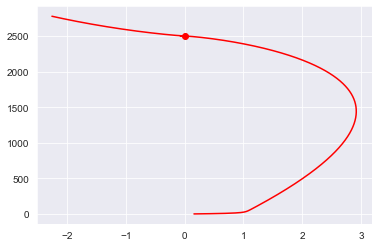

In [48]:
draw(trajectory)